In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
def Newmark(ug, u0, up0=0, Tn=0.1, ξ=0.05,  Δt=0.01, ϒ=1/2, β=1/6):
    m = 1
    p = -m*ug

    k = m*(2*np.pi/Tn)**2
    Wn = 2*np.pi/Tn
    C = 2*ξ*Wn*m

    u = np.zeros(len(p))
    u[0] = u0
    up = np.zeros(len(p))
    up[0] = up0
    upp = np.zeros(len(p))
    upp[0] = (p[0] - C*up[0] - k*u[0])/m

    a1 = m/(β*Δt**2) + ϒ*C/(β*Δt)
    a2 = m/(β*Δt) + (ϒ/β - 1)*C
    a3 = (1/(2*β) - 1)*m + Δt*C*(ϒ/(2*β)-1)

    kt = k + a1

    for i in range(len(p)-1):
        pti_1 = p[i+1] + a1*u[i] + a2*up[i] + a3*upp[i]
        u[i+1] = pti_1/kt
        up[i+1] = ϒ/(β*Δt)*(u[i+1] - u[i]) + (1 - ϒ/β) * \
            up[i] + Δt*(1 - ϒ/(2*β))*upp[i]
        upp[i+1] = (u[i+1] - u[i])/(β*Δt**2) - up[i] / \
            (β*Δt) - (1/(2*β) - 1)*upp[i]

    return u, up, upp


def maxi(x):
    return max(abs(x.min()), abs(x.max())).round(2)

In [139]:
a = pd.read_excel('sismopy.xlsx').values
dt, t, ug = a[1, 0], a[:, 0], a[:, 1]
Tn = 0.1
ϒ, β = 1/2, 1/6

In [140]:
u, up, upp = Newmark(ug, 0, 0, Tn, 0.05, dt, ϒ, β)

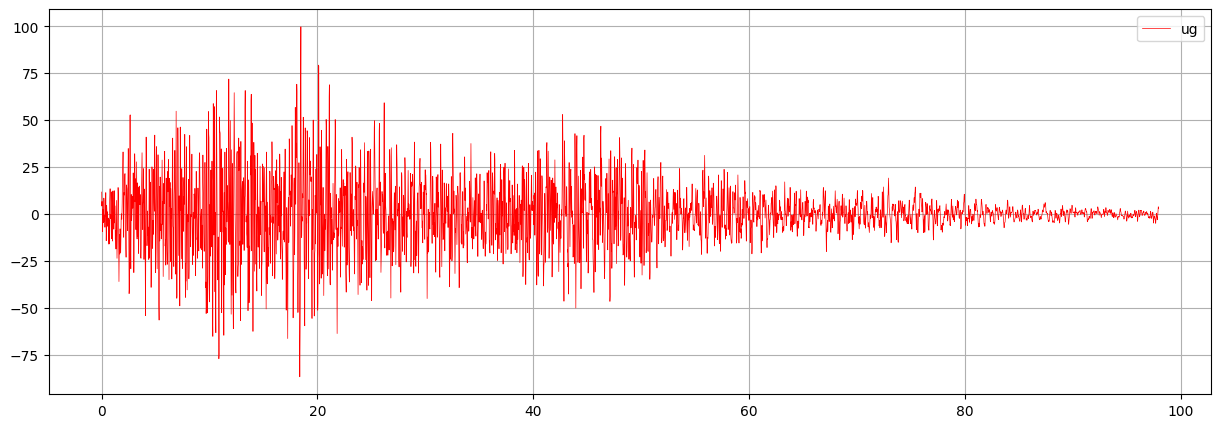

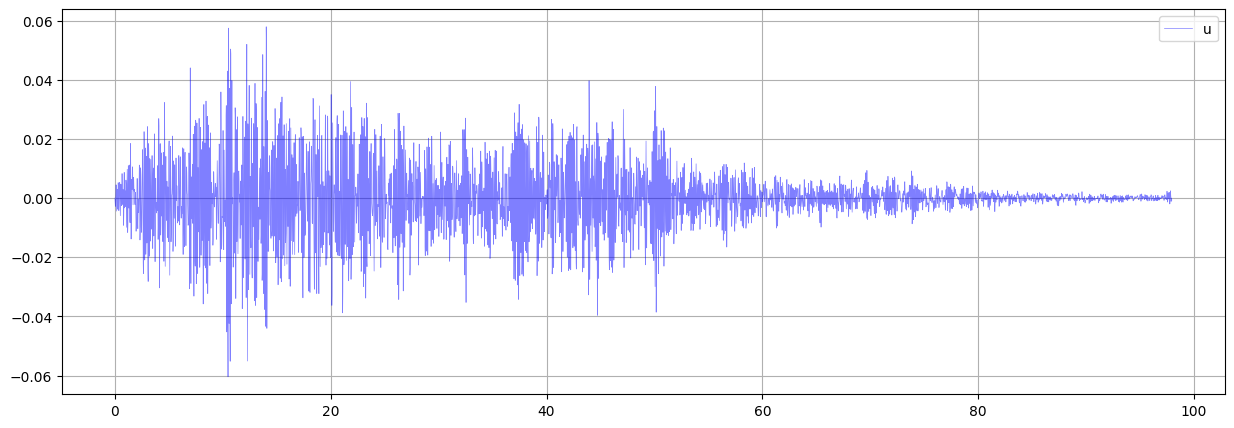

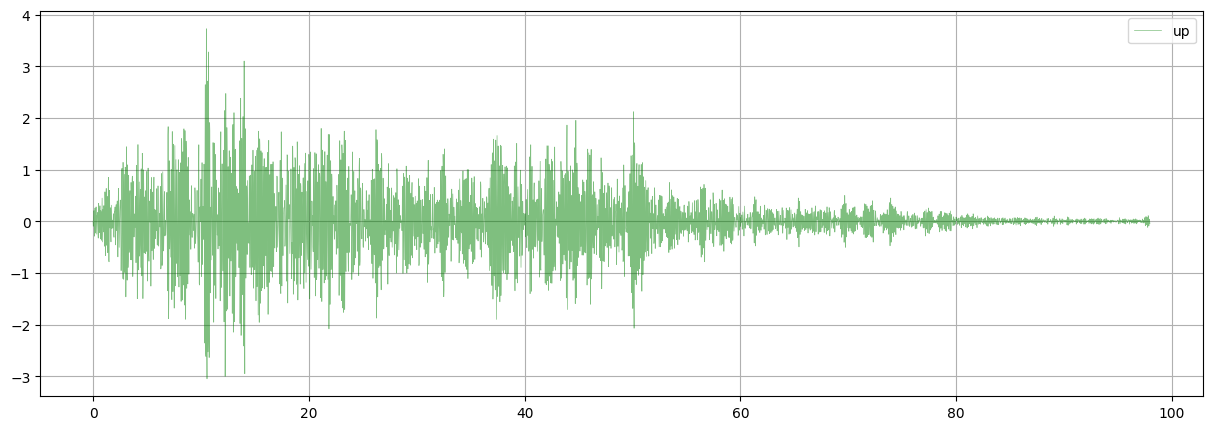

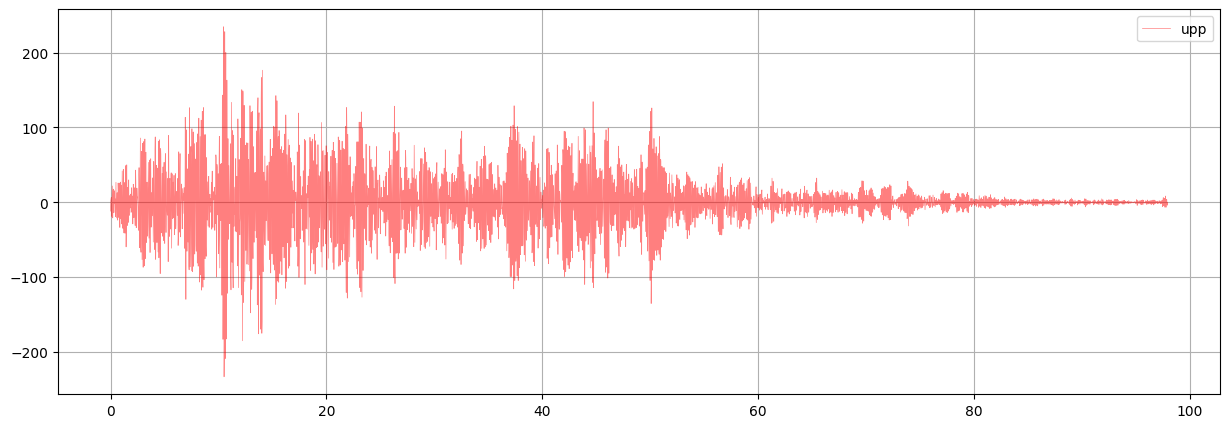

In [141]:
plt.figure(figsize=(15, 5))
plt.plot(t, ug, label='ug', color='red', linewidth=0.5, linestyle='-', alpha=1)
plt.legend(),
plt.grid()

plt.figure(figsize=(15, 5))
plt.plot(t, u, label='u', color='blue',
         linewidth=0.5, linestyle='-', alpha=0.5)
plt.legend(),
plt.grid()

plt.figure(figsize=(15, 5))
plt.plot(t, up, label='up', color='green',
         linewidth=0.5, linestyle='-', alpha=0.5)
plt.legend(),
plt.grid()

plt.figure(figsize=(15, 5))
plt.plot(t, upp, label='upp', color='red',
         linewidth=0.5, linestyle='-', alpha=0.5)
plt.legend()
plt.grid()

In [142]:
# espectros
Tn = np.arange(0.05, 2, 0.01)
ξ = [0.02, 0.05, 0.70, 0.10, 0.20, 0.50, 0.70]
sdg, svg, sag = [], [], []
for ξ_ in ξ:
    sd, sv, sa = [], [], []
    for t in Tn:
        u, up, upp = Newmark(ug, 0, 0, t, ξ_, dt, ϒ, β)
        sd_ = maxi(u)
        sd.append(sd_)
        sv_ = maxi(up)
        sv.append(sv_)
        sa_ = maxi(upp)
        sa.append(sa_)
    sdg.append(sd)
    svg.append(sv)
    sag.append(sa)

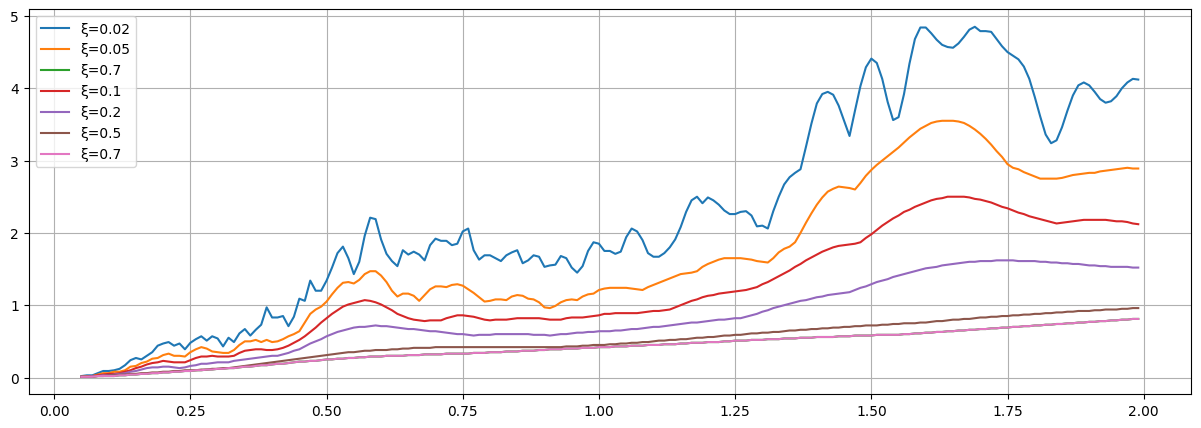

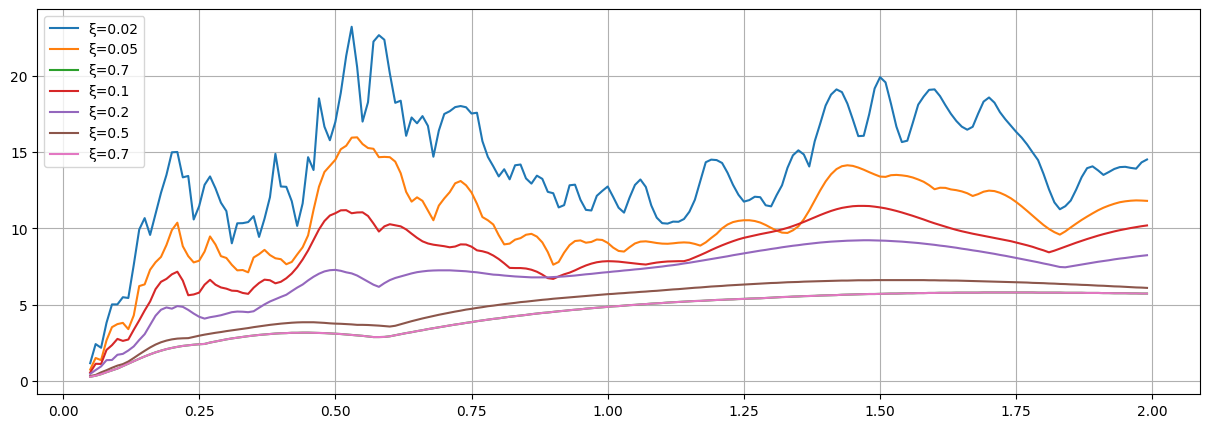

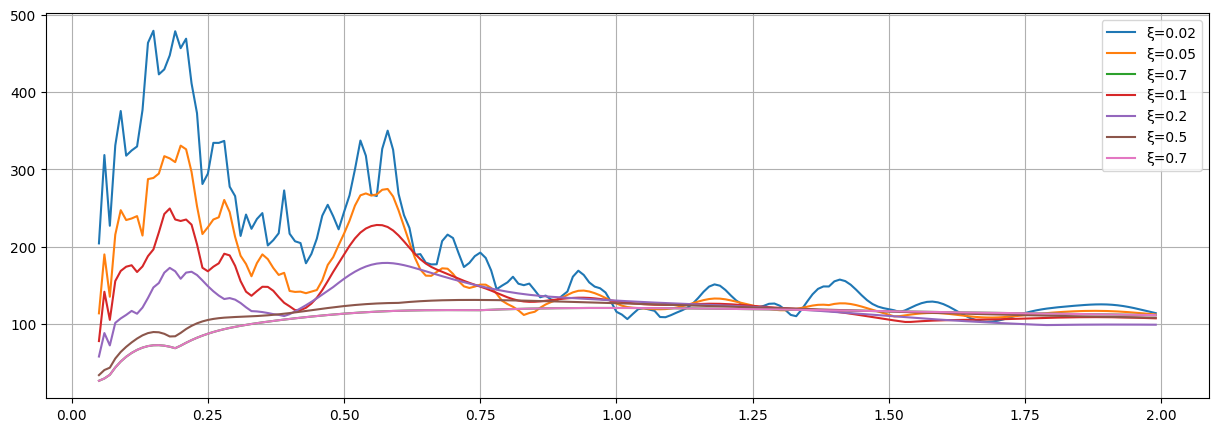

In [143]:
plt.figure(figsize=(15, 5))
for i in range(len(ξ)):
    plt.plot(Tn, sdg[i], label=f'ξ={ξ[i]}')
plt.legend()
plt.grid()

plt.figure(figsize=(15, 5))
for i in range(len(ξ)):
    plt.plot(Tn, svg[i], label=f'ξ={ξ[i]}')
plt.legend()
plt.grid()

plt.figure(figsize=(15, 5))
for i in range(len(ξ)):
    plt.plot(Tn, sag[i], label=f'ξ={ξ[i]}')
plt.legend()
plt.grid()

plt.show()